## Logistic Regression
Logistic Regression is like a linear regression but used for another type of problems. Linear regression predicts a **continuous** outcome, while logistic regression predicts a **categorical** (often binary) outcome. Therefore, logistic regressions are used for **classification** problems. 

In essence:
* If you need to predict a number, use linear regression.
* If you need to predict a category or probability of an event, use logistic regression.

### Why is it called regression if it is a classification algorithm?
The term “regression” in logistic regression refers to the fact that the model is trying to ****predict the probability** of a categorical outcome, such as whether a basketball player will win in 1x1 match.

In logistic regression, the probability of the outcome is represented by a logistic function. The logistic function is a sigmoid curve that has a range of values from 0 to 1. This means that the predicted probability of the outcome can be any value between 0 and 1.

## Implementation

### 1. Calculate Y
In logistic regression, we aim to model the probability of a binary outcome (e.g., $0$ or $1$) based on input features. The hypothesis function of logistic regression is defined as follows:
$$ p(y = 1) = \frac{1}{(1 + \exp(-(\beta_0 + \beta_1x_1 + \beta_2x_2)))} $$

where:
* $p(y = 1)$ is the probability of the binary outcome being equal to $1$
* $\beta_0$ is the intercept
* $\beta_1$ and $\beta_2$ are the coefficients for the predictor variables $x_1$ and $x_2$



<center><img src="img/sigmoid-curve.png" alt="Sigmoid curve" width="500" height="300" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 1.</b> Sigmoid curve (between 0 and 1)</i></p>

In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
def compute_y(x: np.ndarray, w: np.ndarray, b: float) -> float:
    """
    Compute the sigmoid of z

    Args:
      z (float)     : A scalar

    Returns:
      y (float)     : sigmoid(z)
    """
    z = __compute_z(x, w, b)
    return __sigmoid(z)

def __sigmoid(z: float) -> float:
    return 1 / (1 + np.exp(-z)) # Sigmoid function which returns a value between 0 and 1

def __compute_z(x: np.ndarray, w: np.ndarray, b: float) -> float:
    return b + w @ x # (1, n) * (n, 1) = (1,) , where n is the number of features

### 2. Compute loss
#### Why MSE is Not Suitable for Logistic Regression
In classification tasks, where the output is a probability between $0$ and $1$ we use the **sigmoid function** to predict these probabilities.

If we try to use the **Mean Squared Error** for Logistic Regression, we would face several problems:
* **Nonlinearity of the Sigmoid Function**: The sigmoid function introduces nonlinearity, and when we plug it into the MSE formula, the cost function becomes non-convex. This means it could have **multiple local minima**, making it harder for Gradient Descent to find the optimal solution.
* **Squaring Errors**: The MSE squares the diff between the predicted probability and the actual class label ($0$ or $1$). When the prediction is far from the actual value, the error gets magnified. However, because the outputs of Logistic Regression are probabilities (values between $0$ and $1$), squaring these small diffs can make it difficult for the model to learn effectively.

#### The Solution: Log Loss (Cross-Entropy)
Instead of MSE, Logistic Regression uses a different cost function called Log Loss (or Cross-Entropy). Log Loss penalizes incorrect predictions more effectively than MSE and helps the model learn to improve. It works by taking the **logarithm of predicted probabilities**, allowing the model to focus on making confident predictions closer to the true class labels.

The loss is the diff between predicted and actual $y$ values.
$$ J = - \sum y log(\hat{y}) + (1-y) log(1-\hat{y}) $$

In [123]:
def compute_loss(X: np.ndarray, Y: np.ndarray, w: np.ndarray, b: float) -> float:
  """Calculates the loss (cost) for a given X (set of vectors), Y (target values), w (weights), and b (bias).""" 
  m = X.shape[0]        # The number of examples (rows) in the training set
  loss = 0.

  for i in range(m):
    y_pred = compute_y(X[i], w, b)
    loss += -(Y[i] * np.log(y_pred) + (1-Y[i]) * np.log(1-y_pred)) # Cross-Entropy
  return loss / m

### 3. Gradient descent
We'll do a gradient descent in order to optimize the weights.


$$ \frac{dJ}{dw} = X^T (\hat{y} - y) $$

$$ \frac{dJ}{db} = \sum (\hat{y} - y) $$

In [124]:
def compute_gradient(X: np.ndarray, Y: np.ndarray, w: np.ndarray, b: float) -> tuple[np.ndarray, float]: 
    """
    Computes the gradient for logistic regression with multiple features.

    Args:
      X (ndarray (m,n))       : input data, m rows with n features
      Y (ndarray (m,))        : target values
      w (ndarray (n,))        : model weights  
      b (scalar)              : model bias
      
    Returns:
      dj_dw (ndarray (n,))    : The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)          : The gradient of the cost w.r.t. the parameter b. 
    """
    # Calculate all the predicted values
    m = X.shape[0]               # number of rows
    Y_pred = np.zeros(m)
    for i in range(m):
      Y_pred[i] = compute_y(X[i], w, b)
    
    dj_dw = X.T @ (Y_pred - Y) / m
    dj_db = np.sum(Y_pred - Y) / m

    return dj_db, dj_dw

### 4. Train

After each iteration of the gradient descent we need to update the weights and store the current loss.

In [125]:
def fit(X: np.ndarray, Y: np.ndarray, weights: np.ndarray, bias: float, learn_rate: float, epochs: int): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with specified learning rate.

    Args:
      X (ndarray (m,n))       : input data, m examples with n features
      Y (ndarray (m,))        : target values
      weights (ndarray (n,))  : initial model parameters  
      bias (float)            : initial model parameter
      learn_rate (float)      : Learning rate
      epochs (int)            : number of iterations to run gradient descent

    Returns:
      weights (ndarray (n,))  : Updated values of parameters 
      bias (float)            : Updated value of parameter 
      losses (list)           : History of losses
      """
    losses = []            # An array to store history of losses

    for _ in range(epochs):
        # Calculate the gradient for these `w` and `b`
        dj_db, dj_dw = compute_gradient(X, Y, weights, bias)

        # Update `w` and `b` based on the gradient (up or down) and the specified learning rate
        weights -= learn_rate * dj_dw   # vector operation (w and dj_dw are vectors with the same size)
        bias -= learn_rate * dj_db

        # Save loss at each iteration
        losses.append( compute_loss(X, Y, weights, bias) )

        # Print the cost after every 10% of the iterations
        if _ % 1000 == 0:
            print(f"Iteration {_} - Loss: {losses[-1]:.4f}")

    return weights, bias, losses # return final w,b and J history for graphing

### 5. Predict
We need a method that makes binary predictions. To convert the predicted probabilities into binary predictions, a threshold ($0.5$) is applied.

In [126]:
def predict(x: np.ndarray, w: np.ndarray, b: float) -> float:
    '''
    Predict the probability of a binary outcome based on the input features.

    Args:
      x (ndarray): A vector (observation)

    Returns:
      y_pred (int): 1 if sigmoid(z) > 0.5 else 0
    '''
    y_pred = compute_y(x, w, b)
    return 1 if y_pred > 0.5 else 0

### 6. Calculate model accuracy
Compare the predictions of a model to the actual outcome values.

In [127]:
def compute_accuracy(X: np.ndarray, Y: np.ndarray, w: np.ndarray, b: float) -> float:
    '''
    Compute the accuracy of the model.

    Args:
      X (ndarray): A dataset of input features
      Y (ndarray): A dataset of target values
      w (ndarray): A vector of weights
      b (float): A scalar
    '''
    m = X.shape[0]
    correct_predictions = 0
    for i in range(m):
        y_pred = predict(X[i], w, b)
        if y_pred == Y[i]:
            correct_predictions += 1
    return correct_predictions / m

### 7. Demo
Let's execute a demo. Again, by using the sample data for monthly salaries in the ML industry.


Iteration 0 - Loss: 0.6722
Iteration 1000 - Loss: 0.5479
Iteration 2000 - Loss: 0.5115
Iteration 3000 - Loss: 0.4944
Iteration 4000 - Loss: 0.4850
Iteration 5000 - Loss: 0.4794
Iteration 6000 - Loss: 0.4758
Iteration 7000 - Loss: 0.4734
Iteration 8000 - Loss: 0.4717
Iteration 9000 - Loss: 0.4706
Iteration 10000 - Loss: 0.4697
Iteration 11000 - Loss: 0.4691
Iteration 12000 - Loss: 0.4686
Iteration 13000 - Loss: 0.4683
Iteration 14000 - Loss: 0.4680
Iteration 15000 - Loss: 0.4678
Iteration 16000 - Loss: 0.4677
Iteration 17000 - Loss: 0.4675
Iteration 18000 - Loss: 0.4674
Iteration 19000 - Loss: 0.4674

Final weights: [ 0.51722429 -0.00917398] and bias: -0.03557769704347439
Accuracy: 67%


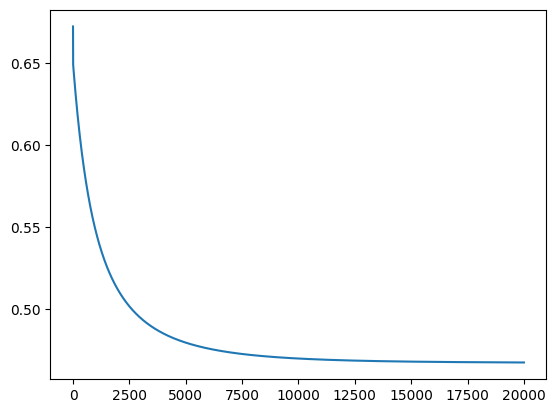

In [128]:
# X1 = Basketball players - years of experience
X1 = [1.2, 1.3, 1.5, 1.8, 2, 2.1, 2.2, 2.5, 2.8, 2.9, 3.1, 3.3, 3.5, 3.8, 4, 4.1, 4.5, 4.9, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 10, 11, 12, 13, 14, 15]
# X2 = Height (cm)
X2 = [181, 190, 202, 185, 178, 189, 204, 192, 183, 184, 195, 196, 197, 188, 189, 190, 191, 182, 183, 190, 185, 186, 197, 191, 189, 200, 186, 189, 191, 190, 195, 193, 187, 192, 190, 187]
# Y = Win or Lose
Y = [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Merge the X1 and X2 into a single X
X = [[x1, x2] for x1, x2 in zip(X1, X2)]

# Convert the X, Y to a numpy arrays
X = np.array(X)
Y = np.array(Y)

# Configure gradient descent settings
learn_rate = 0.0002   # learning rate (step size)
epochs = 20000   # number of iterations (epochs)
weights = np.zeros(X.shape[1])
bias = 0

weights, bias, losses = fit(X, Y, weights, bias, learn_rate, epochs)

print(f"\nFinal weights: {weights} and bias: {bias}")
print(f"Accuracy: {compute_accuracy(X, Y, weights, bias) * 100:.0f}%")

# Plot the loss function
plt.plot(np.arange(epochs), losses)
plt.show()


## References
* (Understanding Logistic Regression: A Beginner’s Guide)[https://medium.com/@novus_afk/understanding-logistic-regression-a-beginners-guide-73f148866910]
* (Logistic Regression)[https://medium.com/@RobuRishabh/logistic-regression-c2d2bac7afd8]